##Data extraction

In [1]:
countries = ["Australia", "Spain", "Canada", "Brazil", "France", "Greece"]
start_year = 1980
end_year = 2020
years = list(range(start_year, end_year+1))

In [2]:
import numpy as np
import pandas as pd


In [3]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
def filter_dataframe_by_year(dataframe, column_name, from_year, to_year):
  return dataframe[(dataframe[column_name] >= from_year) & (dataframe[column_name] <= to_year)]

def filter_dataframe_by_country(dataframe, column_name, countries):
  return dataframe[dataframe[column_name].isin(countries)]

In [5]:
def interpolate_dataframe(dataframe, year_column_name, country_name_column, value_column_name, start_year, end_year):
  dataframe.set_index(year_column_name, inplace=True)
  dataframe = dataframe.reset_index()
  dataframe[year_column_name] = dataframe[year_column_name].astype('int64')
  dataframe.set_index([year_column_name, country_name_column], inplace=True)
  dataframe = dataframe.reindex(pd.MultiIndex.from_product([years, dataframe.index.levels[1]], names=[year_column_name, country_name_column]))
  dataframe[value_column_name] = dataframe.groupby(country_name_column).transform(lambda x: x.interpolate())
  dataframe = dataframe.reset_index()
  return dataframe

In [6]:
carbon_data = pd.read_csv("drive/MyDrive/ML-lab1/co2_emissions_kt_by_country.csv")
carbon_data = carbon_data.drop("country_code", axis=1)
carbon_data

,country_name,year,value
0,Aruba,1960,11092.675000
1,Aruba,1961,11576.719000
2,Aruba,1962,12713.489000
3,Aruba,1963,12178.107000
4,Aruba,1964,11840.743000
...,...,...,...
13948,Zimbabwe,2015,12430.000305
13949,Zimbabwe,2016,11020.000458
13950,Zimbabwe,2017,10340.000153
13951,Zimbabwe,2018,12380.000114


In [7]:
carbon_data = filter_dataframe_by_year(carbon_data, 'year', start_year, end_year)
carbon_data = filter_dataframe_by_country(carbon_data, 'country_name', countries)
carbon_data = interpolate_dataframe(carbon_data, 'year', 'country_name', "value", start_year, end_year)
carbon_data = carbon_data.rename(columns={'value': 'carbon_emission'})
carbon_data

,year,country_name,carbon_emission
0,1980,Australia,220746.066000
1,1980,Brazil,187090.340000
2,1980,Canada,443233.957000
3,1980,France,505363.938000
4,1980,Greece,51429.675000
...,...,...,...
241,2020,Brazil,434299.987793
242,2020,Canada,580210.021973
243,2020,France,300519.989014
244,2020,Greece,60000.000000


In [8]:
gdp_data = pd.read_csv("drive/MyDrive/ML-lab1/gdp_csv.csv")
gdp_data = gdp_data.dropna()
gdp_data = gdp_data.drop("Country Code", axis=1)
gdp_data = filter_dataframe_by_year(gdp_data, 'Year', start_year, end_year)
gdp_data = filter_dataframe_by_country(gdp_data, 'Country Name', countries)
gdp_data = interpolate_dataframe(gdp_data, 'Year', 'Country Name', "Value", start_year, end_year)
gdp_data = gdp_data.rename(columns={'Value': 'GDP'})
gdp_data = gdp_data.rename(columns={'Country Name': 'country_name'})
gdp_data = gdp_data.rename(columns={'Year': 'year'})
gdp_data

,year,country_name,GDP
0,1980,Australia,1.498875e+11
1,1980,Brazil,2.350246e+11
2,1980,Canada,2.738538e+11
3,1980,France,7.035253e+11
4,1980,Greece,5.682966e+10
...,...,...,...
241,2020,Brazil,1.796187e+12
242,2020,Canada,1.529760e+12
243,2020,France,2.465454e+12
244,2020,Greece,1.926908e+11


In [9]:
population_data = pd.read_csv("drive/MyDrive/ML-lab1/world-population.csv")
population_data = population_data.dropna()
columns_to_keep = ['country', 'Year', 'Population']
population_data = population_data.drop(columns=[col for col in population_data.columns if col not in columns_to_keep])
population_data = filter_dataframe_by_year(population_data, 'Year', start_year, end_year)
population_data = filter_dataframe_by_country(population_data, 'country', countries)
population_data = interpolate_dataframe(population_data, 'Year', 'country', "Population", start_year, end_year)
population_data = population_data.rename(columns={'country': 'country_name'})
population_data = population_data.rename(columns={'Year': 'year'})
population_data

,year,country_name,Population
0,1980,Australia,14588405.0
1,1980,Brazil,120694009.0
2,1980,Canada,24416886.0
3,1980,France,53868009.0
4,1980,Greece,9627002.0
...,...,...,...
241,2020,Brazil,212559417.0
242,2020,Canada,37742154.0
243,2020,France,65273511.0
244,2020,Greece,10423054.0


In [10]:
energy_data = dict()
for i in countries:
  energy_data[i] = pd.read_csv("drive/MyDrive/ML-lab1/"+i+"_energy_data.csv")
energy_data_full = pd.concat(list(energy_data.values()), axis=0)
columns_to_keep = ['country', 'year', 'energy_cons_change_pct']
energy_data_full = energy_data_full.drop(columns=[col for col in energy_data_full.columns if col not in columns_to_keep])
energy_data_full = filter_dataframe_by_year(energy_data_full, 'year', start_year, end_year)
energy_data_full = filter_dataframe_by_country(energy_data_full, 'country', countries)
energy_data_full = interpolate_dataframe(energy_data_full, 'year', 'country', "energy_cons_change_pct", start_year, end_year)
energy_data_full = energy_data_full.rename(columns={'country': 'country_name'})
energy_data_full = energy_data_full.rename(columns={'Year': 'year'})
energy_data_full = energy_data_full.fillna(0)
energy_data_full["energy_cons"] = energy_data_full["energy_cons_change_pct"].cumsum()*population_data['Population']
energy_data_full = energy_data_full.drop(columns=["energy_cons_change_pct"])
energy_data_full["energy_cons"] + energy_data_full["energy_cons"].min()
energy_data_full

,year,country_name,energy_cons
0,1980,Australia,5.412298e+06
1,1980,Brazil,2.894242e+08
2,1980,Canada,1.053344e+08
3,1980,France,1.620888e+08
4,1980,Greece,1.992789e+07
...,...,...,...
241,2020,Brazil,7.478542e+10
242,2020,Canada,1.306426e+10
243,2020,France,2.194065e+10
244,2020,Greece,3.335325e+09


In [11]:
data = pd.merge(
    pd.merge(
        pd.merge(carbon_data, gdp_data, on=['country_name', 'year'], how='inner'),
        population_data,
        on=['country_name', 'year'],
        how='inner'),
    energy_data_full,
    on=['country_name', 'year'],
    how='inner')
data.set_index('year', inplace=True)
data

,country_name,carbon_emission,GDP,Population,energy_cons
year,,,,,
1980,Australia,220746.066000,1.498875e+11,14588405.0,5.412298e+06
1980,Brazil,187090.340000,2.350246e+11,120694009.0,2.894242e+08
1980,Canada,443233.957000,2.738538e+11,24416886.0,1.053344e+08
1980,France,505363.938000,7.035253e+11,53868009.0,1.620888e+08
1980,Greece,51429.675000,5.682966e+10,9627002.0,1.992789e+07
...,...,...,...,...,...
2020,Brazil,434299.987793,1.796187e+12,212559417.0,7.478542e+10
2020,Canada,580210.021973,1.529760e+12,37742154.0,1.306426e+10
2020,France,300519.989014,2.465454e+12,65273511.0,2.194065e+10


<ipython-input-12-88b5bf393427>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


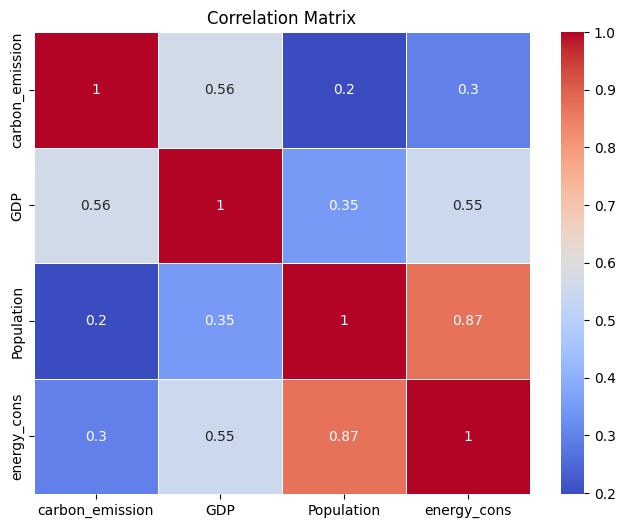

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

##Network

In [13]:
import keras
from keras.layers import Dense, Activation, Dropout
from keras.layers import TimeDistributed, Conv1D, AveragePooling1D, Conv2D, AveragePooling2D, BatchNormalization, Flatten
from keras.layers import LSTM
from keras.models import Sequential
import numpy as np

In [14]:
import matplotlib.pyplot as plt
x_size=9
y_size=1

def print_loss(hist):
  plt.plot(hist.history['loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train'], loc='upper left')

  plt.tight_layout()
  plt.show()

def plot_test_real(x, real, preds, param, title):
  plt.plot(x, real, label="real")
  plt.plot(x, preds,  label="predicted")
  plt.ylabel(param)
  plt.xlabel('Year')
  plt.title(title)
  plt.legend(loc="upper right")
  plt.show()

In [15]:
def getNetwork(input_shape):

  model = Sequential()

  model.add(Conv1D(3, 8, strides=1, activation='relu', padding='same', input_shape=input_shape))
  model.add(AveragePooling1D(pool_size=2))

  model.add(Conv1D(3, 8, strides=1, activation='relu', padding='same'))
  model.add(AveragePooling1D(pool_size=2))

  model.add(LSTM(64))

  model.add(Dense(1, activation="linear"))
  opt = keras.optimizers.Adam(learning_rate=0.01)
  model.compile(loss="mse", optimizer=opt)

  return model

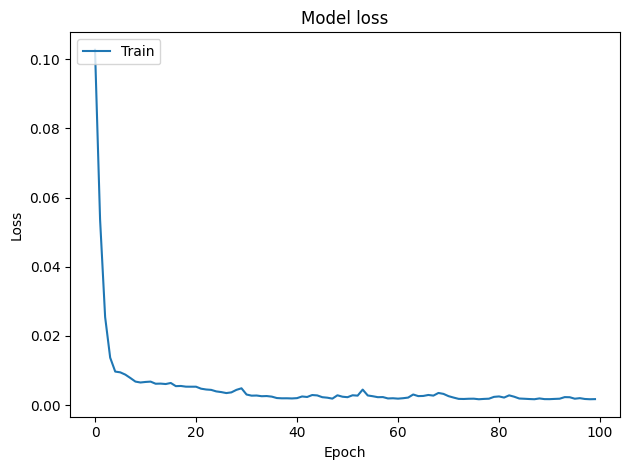

1/1 [==============================] - 1s 509ms/step


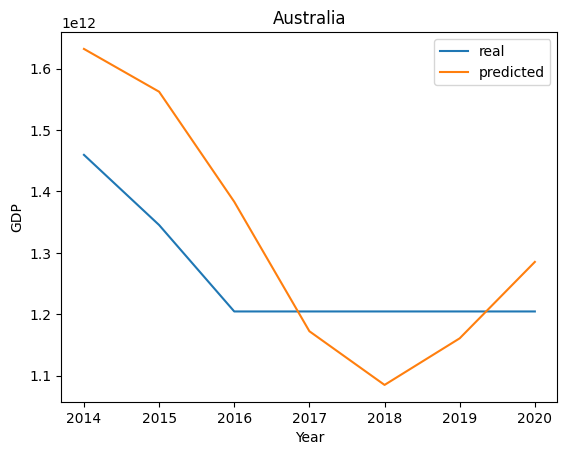

1/1 [==============================] - 0s 38ms/step


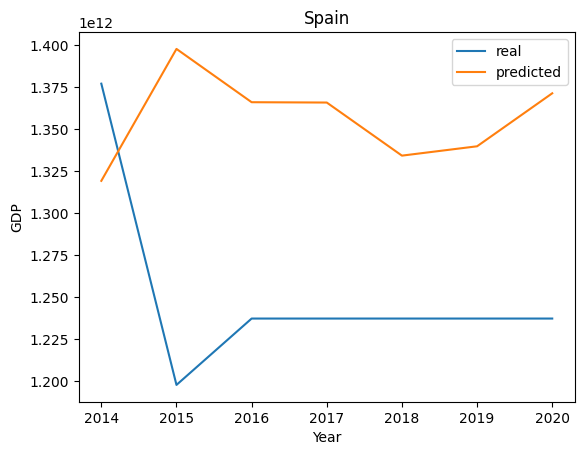

1/1 [==============================] - 0s 37ms/step


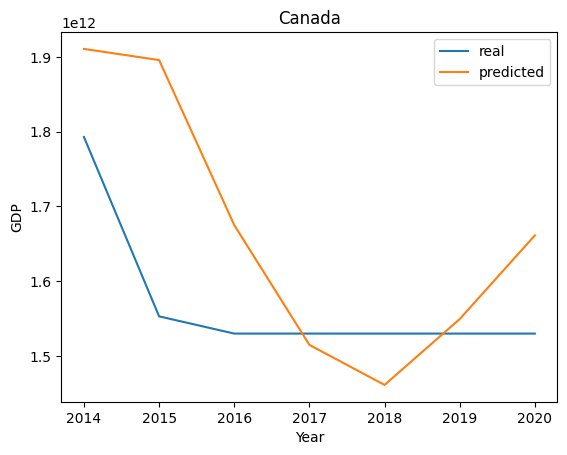

1/1 [==============================] - 0s 37ms/step


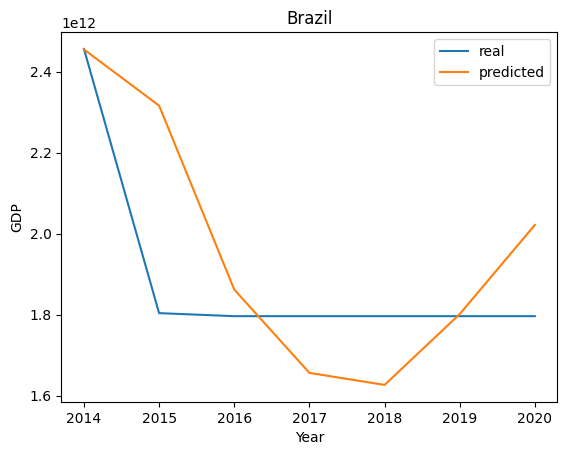

1/1 [==============================] - 0s 42ms/step


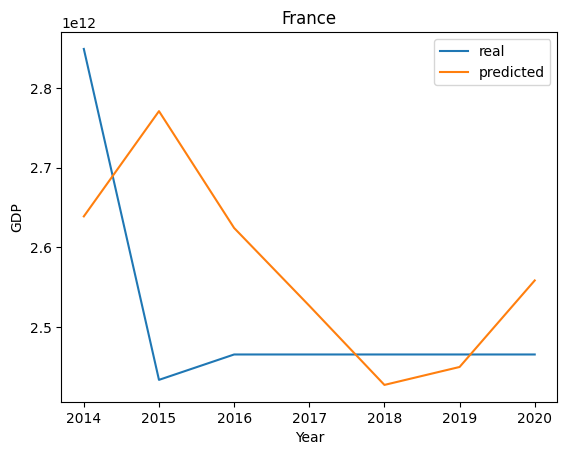

1/1 [==============================] - 0s 43ms/step


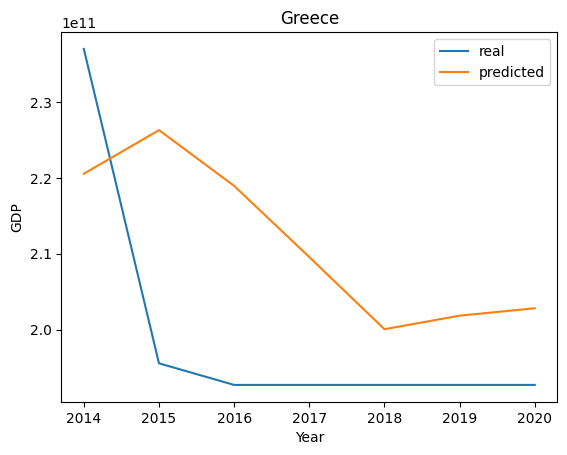

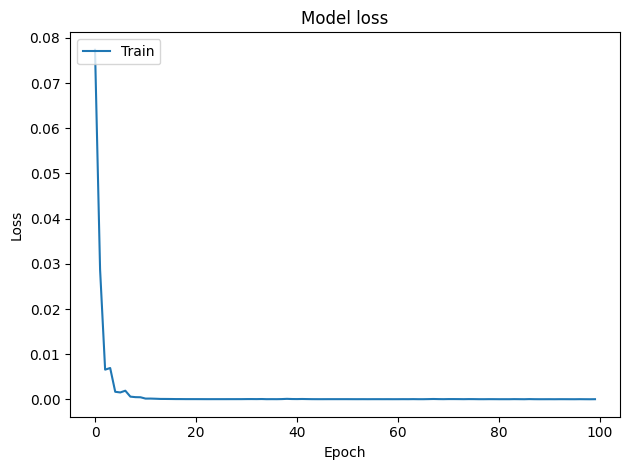

1/1 [==============================] - 0s 465ms/step


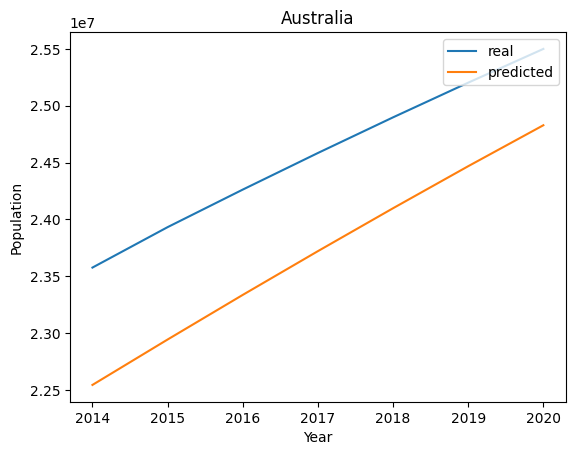

1/1 [==============================] - 0s 52ms/step


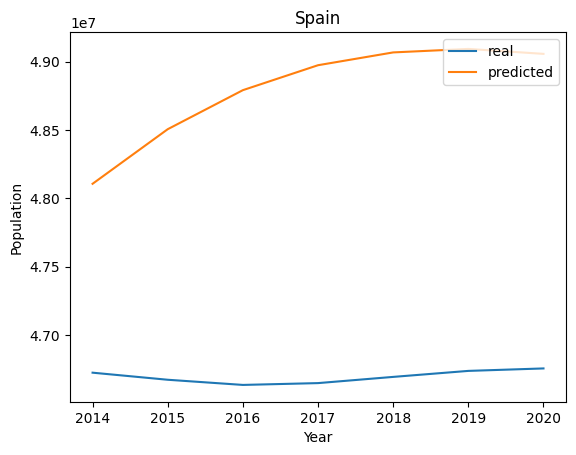

1/1 [==============================] - 0s 57ms/step


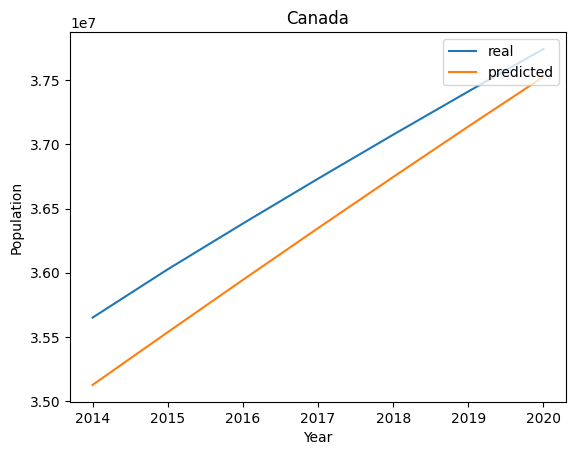

1/1 [==============================] - 0s 42ms/step


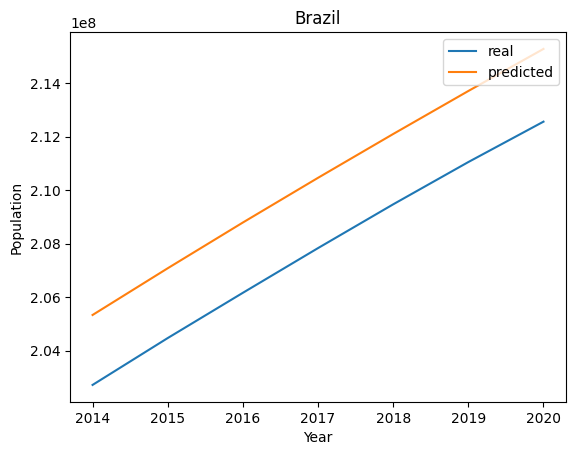

1/1 [==============================] - 0s 157ms/step


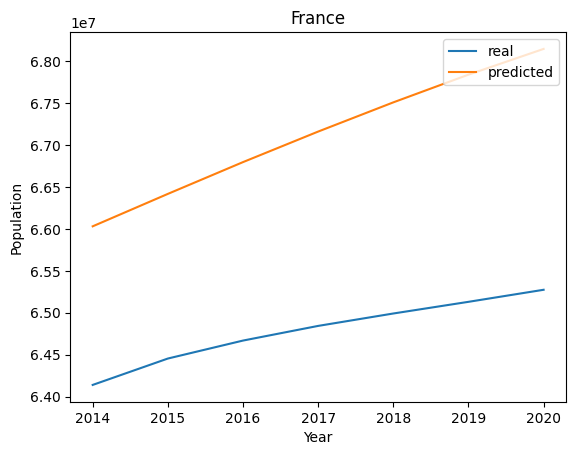

1/1 [==============================] - 0s 62ms/step


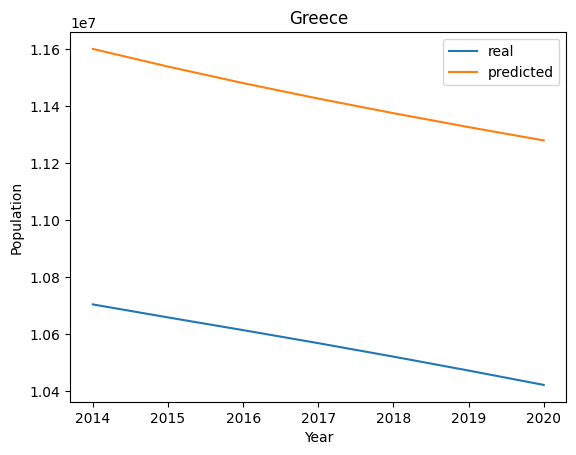

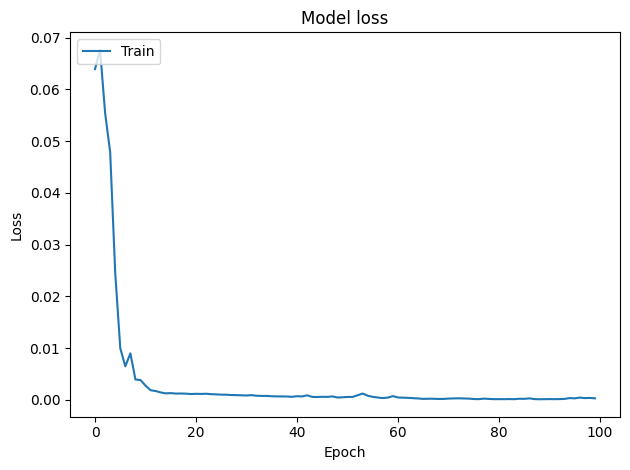

1/1 [==============================] - 1s 502ms/step


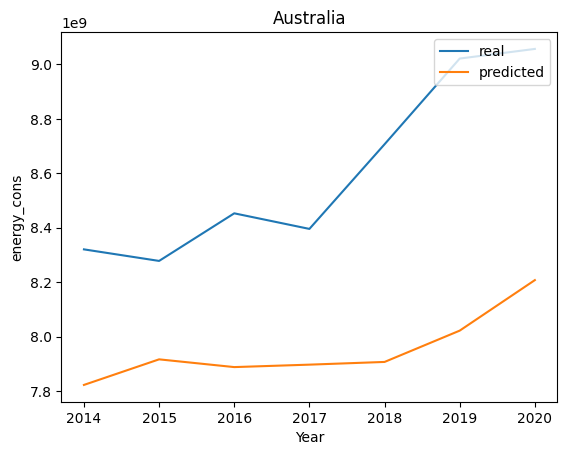

1/1 [==============================] - 0s 46ms/step


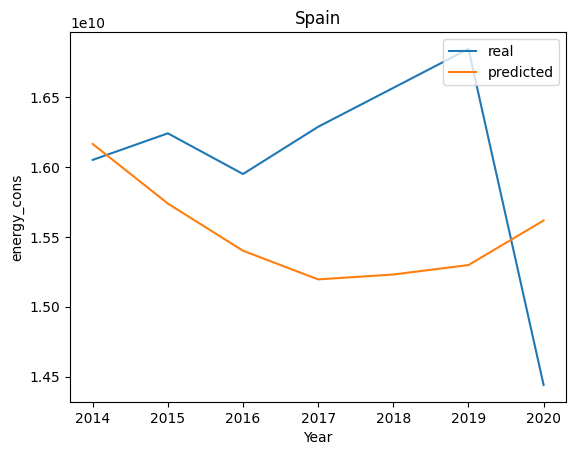

1/1 [==============================] - 0s 44ms/step


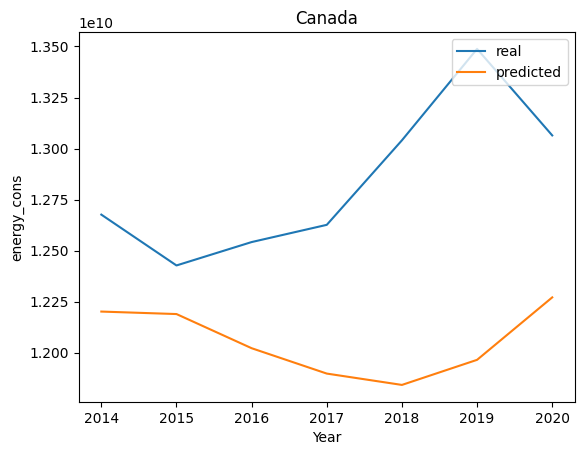

1/1 [==============================] - 0s 48ms/step


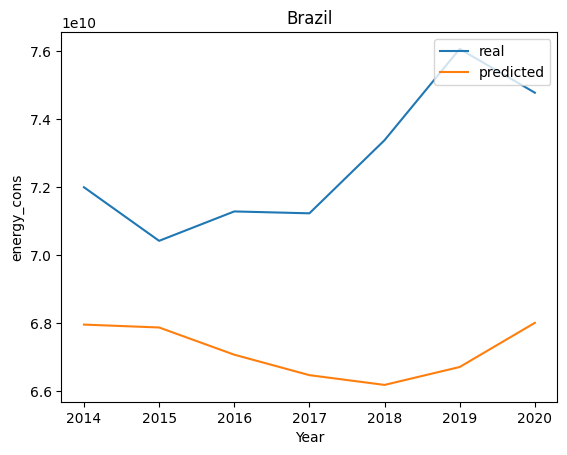

1/1 [==============================] - 0s 39ms/step


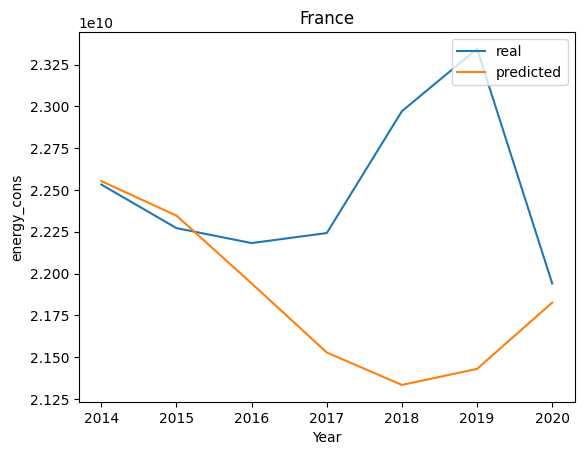

1/1 [==============================] - 0s 36ms/step


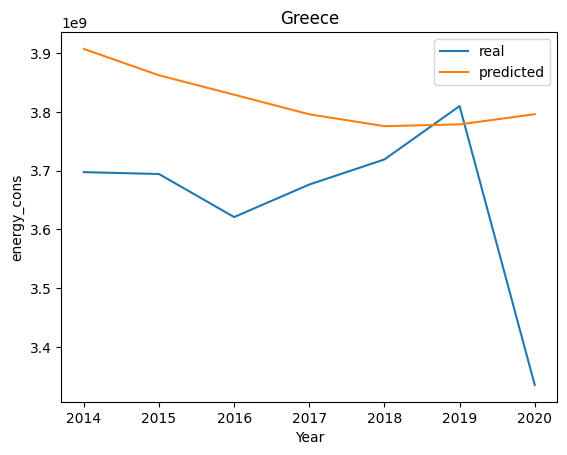

In [16]:
from sklearn.preprocessing import MinMaxScaler

params = ["GDP", "Population", "energy_cons"]

x_dict = dict()
y_dict = dict()
scaler = dict()
for p in params:
  scaler[p] = MinMaxScaler()
  data[p] = scaler[p].fit_transform(data[p].to_numpy().reshape(-1, 1))
models = dict()
for param in params:

  x_dict[param] = []
  y_dict[param] = []

  x_train = dict()
  y_train = dict()
  x_test = dict()
  y_test = dict()

  preds = dict()
  real = dict()

  for country in countries:

    for i in range(len(years) - (x_size+y_size)+1):
        a = data[data['country_name'] == country][param][i:(i + x_size)]
        x_dict[param] = list(x_dict[param])
        x_dict[param].append(a.tolist())
        b = data[data['country_name'] == country][param][(i + x_size):(i + x_size + y_size)]
        y_dict[param] = list(y_dict[param])
        y_dict[param].append(b.tolist())

    x_dict[param], y_dict[param]  = np.array(x_dict[param]), np.array(y_dict[param])

    train_size = int(0.8*len(x_dict[param]))
    x_train[country] = x_dict[param].tolist()[:train_size]
    y_train[country] = y_dict[param].tolist()[:train_size]

    x_test[country] = x_dict[param].tolist()[train_size:]
    y_test[country] = y_dict[param].tolist()[train_size:]
    x_dict[param] = []
    y_dict[param] = []

  models[param] = getNetwork((9, 1))
  tr_x = []
  tr_y = []
  for country in countries:
    tr_x.extend(x_train[country])
    tr_y.extend(y_train[country])
  history = models[param].fit(tr_x, tr_y, epochs=100, verbose=0)

  print_loss(history)

  for country in countries:
    preds[country] = models[param].predict(x_test[country])

    real[country] = scaler[param].inverse_transform(y_test[country])
    preds[country] = scaler[param].inverse_transform(preds[country])
    plot_test_real(years[-x_size+2:], real[country], preds[country], param, country)

In [17]:
scaler["carbon_emission"] = MinMaxScaler()
data["carbon_emission"] = scaler["carbon_emission"].fit_transform(data["carbon_emission"].to_numpy().reshape(-1, 1))

In [18]:
new_years = [i for i in range(2021, 2036)]
params_full = ["GDP", "Population", "energy_cons", "carbon_emission"]
values = dict()
for param in params_full:
  values[param] = dict()
  for country in countries:
    values[param][country] = data[data['country_name'] == country][param].tolist()

for param in params:
   for country in countries:
      for year in new_years:
        x = values[param][country][-x_size:]
        y = models[param].predict(np.asarray([x]))
        values[param][country].append(y[0][0])


1/1 [==============================] - 0s 23ms/step


In [19]:
preds = dict()
for country in countries:
  preds[country] = scaler["Population"].inverse_transform(np.asarray(values["Population"][country]).reshape(-1, 1))

In [20]:
def show_for_countries(label):
  preds = dict()
  for country in countries:
    preds[country] = scaler[label].inverse_transform(np.asarray(values[label][country]).reshape(-1, 1))
    plt.plot([i for i in range(1980, 2036)], preds[country], label = country)
  plt.ylabel(label)
  plt.xlabel('Year')
  plt.legend(loc="upper left")
  plt.show()

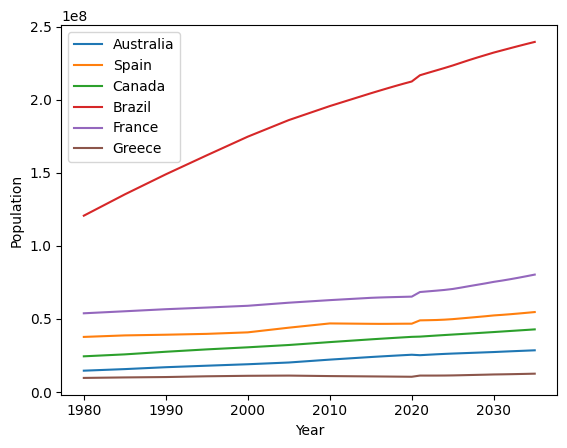

In [21]:
show_for_countries("Population")

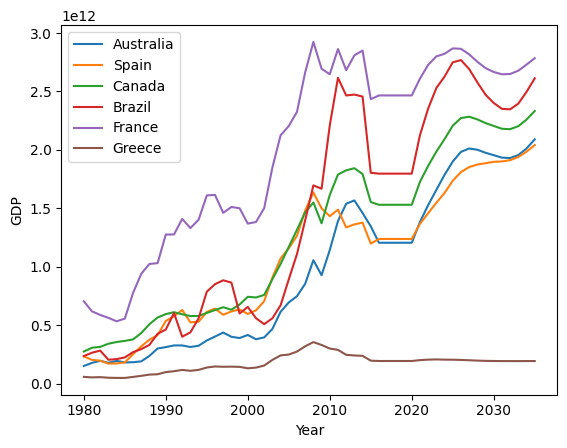

In [22]:
show_for_countries("GDP")

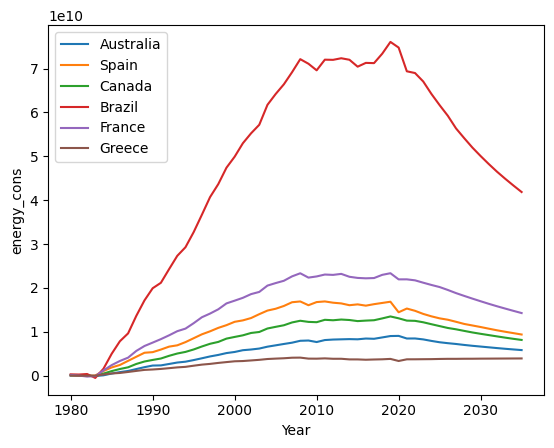

In [23]:
show_for_countries("energy_cons")

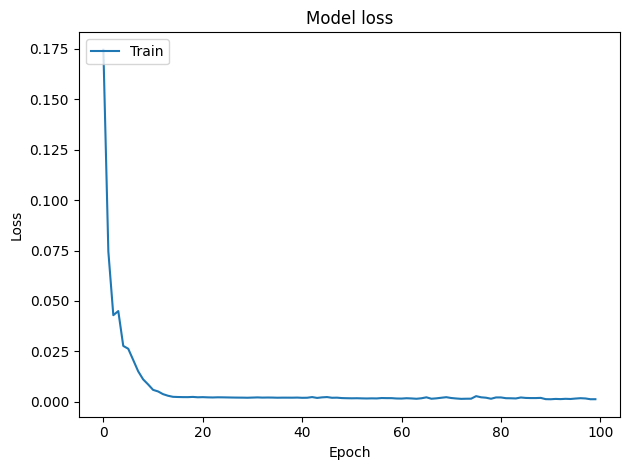

1/1 [==============================] - 0s 494ms/step


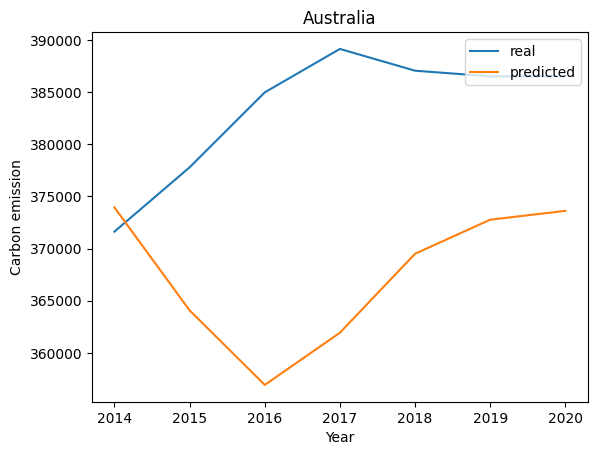

1/1 [==============================] - 0s 38ms/step


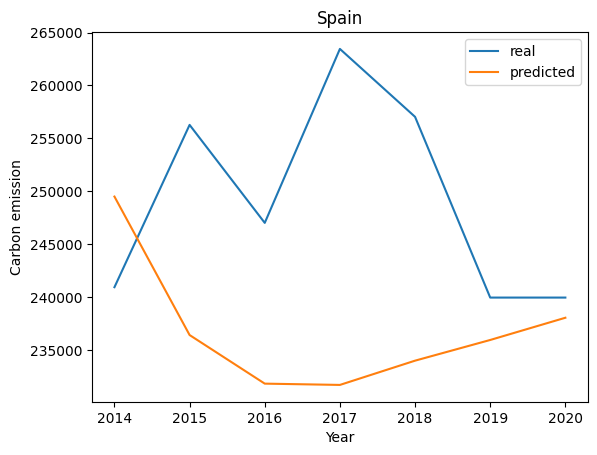

1/1 [==============================] - 0s 43ms/step


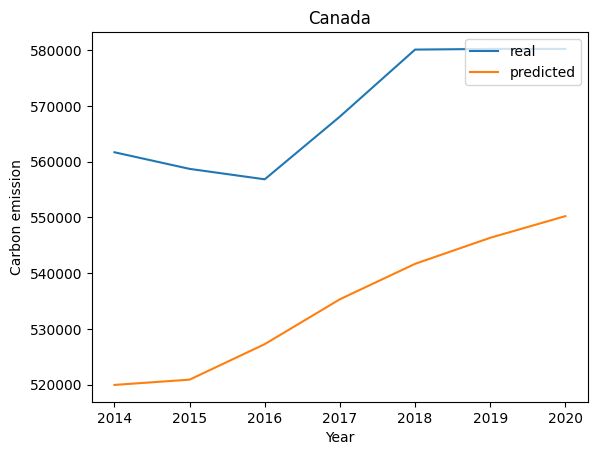

1/1 [==============================] - 0s 41ms/step


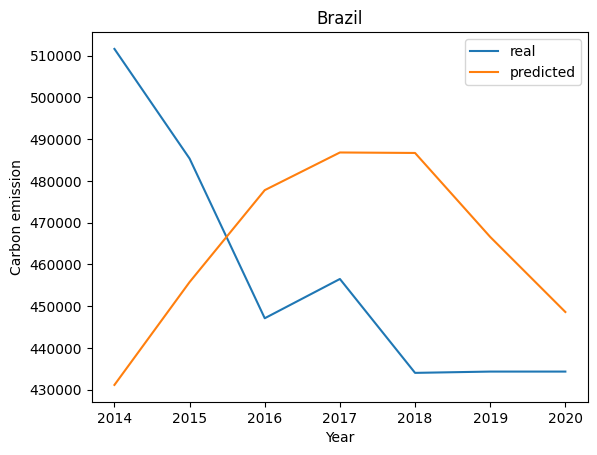

1/1 [==============================] - 0s 39ms/step


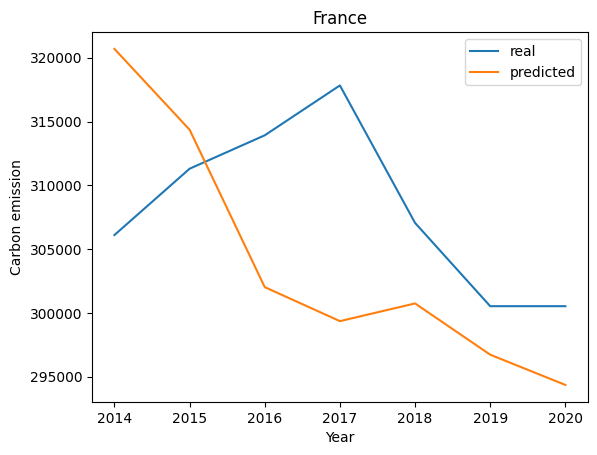

1/1 [==============================] - 0s 46ms/step


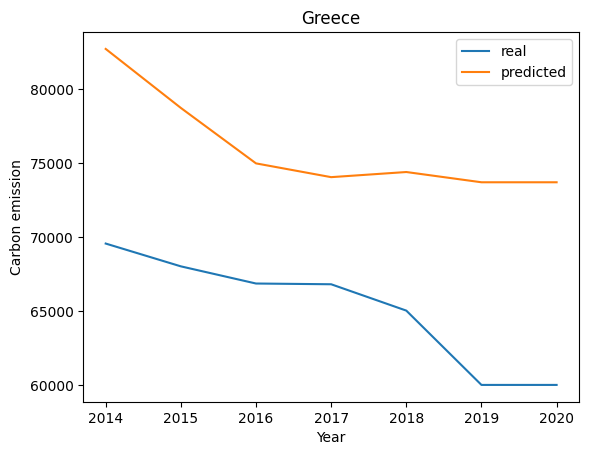

In [24]:
x_dict = []
y_dict = []

x_train = dict()
y_train = dict()
x_test = dict()
y_test = dict()

preds = dict()
real = dict()

for country in countries:

  for i in range(len(years) - (x_size+y_size)+1):
      a = data[data['country_name'] == country][params_full][i:(i + x_size)]
      x_dict = list(x_dict)
      x_dict.append(a)
      b = data[data['country_name'] == country]["carbon_emission"][(i + x_size):(i + x_size + y_size)]
      y_dict = list(y_dict)
      y_dict.append(b.tolist())

  x_dict, y_dict  = np.array(x_dict), np.array(y_dict)

  train_size = int(0.8*len(x_dict))
  x_train[country] = x_dict.tolist()[:train_size]
  y_train[country] = y_dict.tolist()[:train_size]

  x_test[country] = x_dict.tolist()[train_size:]
  y_test[country] = y_dict.tolist()[train_size:]
  x_dict = []
  y_dict = []

model = getNetwork((9, 4))
tr_x = []
tr_y = []
for country in countries:
  tr_x.extend(x_train[country])
  tr_y.extend(y_train[country])

history = model.fit(tr_x, tr_y, epochs=100, verbose=0)

print_loss(history)

for country in countries:
  preds[country] = model.predict(x_test[country])
  real[country] = scaler["carbon_emission"].inverse_transform(y_test[country])
  preds[country] = scaler["carbon_emission"].inverse_transform(preds[country])
  plot_test_real(years[-x_size+2:], real[country], preds[country], "Carbon emission", country)

In [25]:
for country in countries:
      for year in new_years:
        x = []
        ln = len(values["carbon_emission"][country])-1
        for ind in range(ln - x_size, ln):
          x.append([values[p][country][ind] for p in params_full])

        y = model.predict(np.asarray([x]))
        values["carbon_emission"][country].append(y[0][0])

1/1 [==============================] - 0s 33ms/step


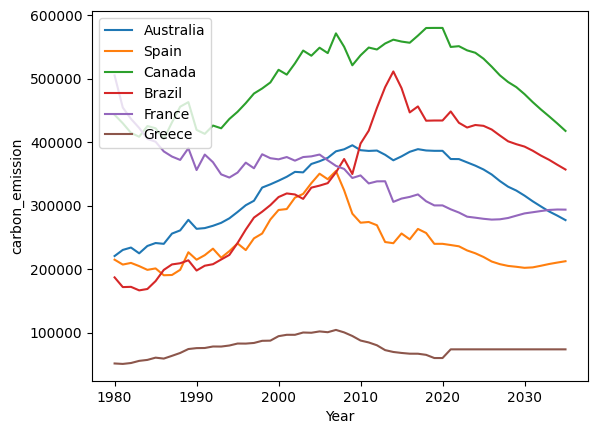

In [26]:
show_for_countries("carbon_emission")